# Create binary analyst of heroes and villains


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras.applications import VGG16
conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150, 150, 3))



In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/content/drive/My Drive/Python_Data/Heroes_n_villains/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))



In [0]:
print(train_labels[0:10])

[0. 1. 1. 1. 1. 0. 0. 1. 0. 1.]


In [0]:
print(validation_labels[0:10])

[1. 1. 0. 1. 1. 1. 0. 0. 0. 0.]


In [0]:
train_labels.shape

(2000,)

**Run the ImageData Generator on the SAMPLES**



In [11]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/content/drive/My Drive/Python_Data/Heroes_n_villains/"
sample_dir = os.path.join(base_dir, "batman")

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode= None)  # changed to none
    i = 0
    for inputs_batch in generator:  # removed labels_batch
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features # removed labels
sample_features = extract_features(sample_dir, 1)

sample_features = np.reshape(sample_features, (1, 4 * 4 * 512))

Found 1 images belonging to 1 classes.


In [12]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 440us/step - loss: 0.7418 - acc: 0.5320 - val_loss: 0.6377 - val_acc: 0.6370
Epoch 2/30
2000/2000 [==============================] - 0s 245us/step - loss: 0.6656 - acc: 0.6050 - val_loss: 0.6222 - val_acc: 0.6540
Epoch 3/30
2000/2000 [==============================] - 0s 245us/step - loss: 0.6158 - acc: 0.6555 - val_loss: 0.6081 - val_acc: 0.6770
Epoch 4/30
2000/2000 [==============================] - 1s 252us/step - loss: 0.5735 - acc: 0.7060 - val_loss: 0.6024 - val_acc: 0.6850
Epoch 5/30
2000/2000 [==============================] - 0s 244us/step - loss: 0.5574 - acc: 0.7215 - val_loss: 0.6030 - val_acc: 0.6780
Epoch 6/30
2000/2000 [==============================] - 0s 242us/step - loss: 0.5397 - acc: 0.7350 - val_loss: 0.5908 - val_acc: 0.6980
Epoch 7/30
2000/2000 [==============================] - 0s 246us/step - loss: 0.5215 - acc: 0.7480 - val_loss: 0.5862 - val_acc: 0.6920


In [8]:
# Test the sample image
# from keras.applications.imagenet_utils import decode_predictions

hv_list = ["hero", "villain"]



# pred_list = []
out = model.predict(sample_features)
for i in out:
  y_pred = int(i>.5)
  # pred_list.append(y_pred)
  print(y_pred, ":", hv_list[y_pred])
  print(out)

# print(pred_list)


1 : villain
[[0.66988754]]


Create graphs


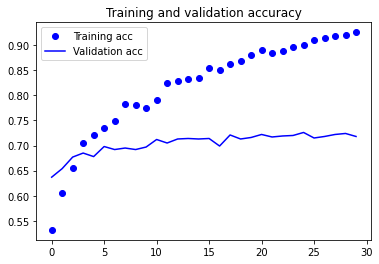

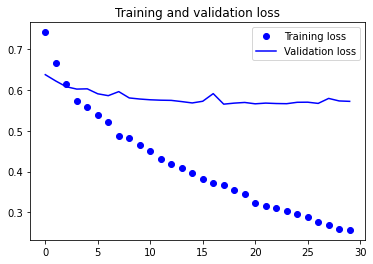

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Confusion Matrix**

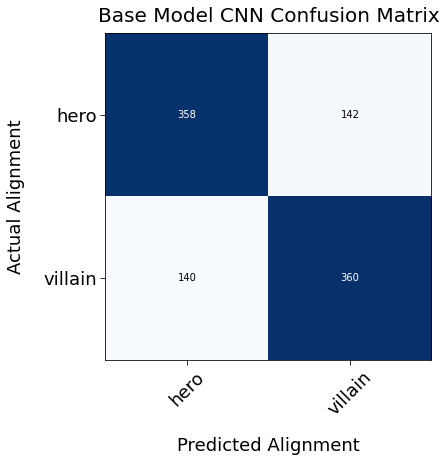

In [14]:
#MD's code
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


hv_list = ["hero", "villain"]

# Create the predictions from validation_features without labels
pred_list = []
out = model.predict(validation_features)
for i in out:
  y_pred = int(i>.5)
  pred_list.append(y_pred)
  # print(y_pred, ":", hv_list[y_pred])

# use the same Validation images and for every hero image = 0, villain = 1
y_target =    validation_labels
# run all the Validation images thru the predictions
y_predicted = pred_list
# cm = confusion_matrix(##test_labels_argmax, y_pred, binary=False)

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted)

fig, ax = plot_confusion_matrix(conf_mat=cm)
fig.set_size_inches(6, 6)
sns.set(font_scale=5.0)
plt.title("Base Model CNN Confusion Matrix", pad = -5, fontsize = 20)
plt.xlabel("Predicted Alignment", fontsize = 18, labelpad = 18)
plt.ylabel("Actual Alignment", fontsize = 18, labelpad = 18)
plt.xticks(np.arange(0,2,1), hv_list, rotation=45, fontsize = 18, )
plt.tick_params(axis="x", length=5)
plt.yticks(np.arange(0,2,1), hv_list, fontsize = 18)
plt.tick_params(axis="y", length=5)
plt.show()

In [0]:
loss, accuracy = model.evaluate(validation_features, validation_labels, batch_size=20, verbose=1);
print("Validation accuracy:", accuracy)

1000/1000 [==============================] - 0s 104us/step
Validation accuracy: 0.7250000035762787
